We want to check if the gravity-Zernike model is still working properly. We will look for trends in the thermal Zernike coefficients derived from out-of-focus holography as a function of elevation. If the gravity-Zernike model is working properly, the curves for the thermal Zernike coefficients should be close to flat, and the Zernike gravity coefficients should show their functional form with elevation (parabolas).

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [24]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

import pandas as pd
from astropy.io import fits

import sys
sys.path.append("/home/sandboxes/psalas/PTCS/AutoOOF/oof_au")

import scan_log

In [86]:
def get_el_zi(df):
    """
    """
    
    idx0 = 0
    idxf = len(df)

    zg_arr = np.empty((len(df), 37), dtype=float)
    zt_arr = np.empty((len(df), 37), dtype=float)
    el_arr = np.empty((len(df)), dtype=float)

    for idx in range(idx0,idxf):

        print(f"Index: {idx}")

        pid = df.at[idx, "id"]

        if pid[0] == "T":
            continue

        projid = "_".join(pid.split("_")[:-1])
        print(projid)
        project = "_".join(pid.split("_")[:-2])
        print(f"Project: {project}")
        session = pid.split("_")[2]
        print(f"Session: {session}")
        semester = pid.split("_")[0][-3:]
        print(f"Semester: {semester}")
        if pid[0] == "T":
            semester = f"20{semester[:-1]}"
        oof_scan = int(pid.split("_")[-1][1:])
        print(f"AutoOOF scan: {oof_scan}")

        proj_path = f"{path[pid[0]]}/{semester}"
        print(proj_path)

        try:
            sl = scan_log.ScanLog(proj_path, projid)
        except FileNotFoundError:
            #proj_path = f"{path[pid[0]]}/{int(semester)+1}"
            #sl = scan_log.ScanLog(proj_path, projid)
            print("Scan log not found...")
            continue

        # We want the applied thermal Zernikes.
        # We can get those from the scan after AutoOOF.
        tz_scan = oof_scan+3
        if tz_scan >= sl.scans.max():
            continue
        try:
            go_file = sl.get_scan_files(tz_scan, "ActiveSurfaceMgr")
        except TypeError:
            if tz_scan+1 > sl.scans.max():
                continue
            go_file = sl.get_scan_files(tz_scan+1, "ActiveSurfaceMgr")

        try:
            hdu = fits.open(go_file)
        except (FileNotFoundError):
            print(f"File not found: {idx}")
            go_file = sl.get_scan_files(tz_scan+1, "ActiveSurfaceMgr")
            hdu = fits.open(go_file)

        if hdu[0].header["THRMZERN"] == 0:
            zt_arr[idx] = np.nan
        else:
            zt_arr[idx] = np.hstack((0, hdu["THRMZERN"].data["Value"]))

        if hdu[0].header["ZERNIKE"] == 0:
            zg_arr[idx] = np.nan
        else:
            zg_arr[idx] = np.hstack((0, hdu["ZERNIKE"].data["Value"]))

        # Now the telescope elevation at the time of AutoOOF.
        go_file = sl.get_scan_files(oof_scan, "Antenna")
        an_hdu = fits.open(go_file)
        el_arr[idx] = an_hdu[0].header["SOBSC_EL"]
        
    return el_arr, zg_arr, zt_arr

In [25]:
path = {"A":"/home/archive/science-data/",
        "T":"/home/archive/test-data/"}

In [94]:
semesters = ["16A", "16B",]

df = pd.DataFrame()

for s in semesters:
    df_ = pd.read_hdf(f"../home_archive_science-data_{s}.hdf", f"home_archive_science-data_{s}")
    df = df.append(df_, ignore_index=True)
    
#df.to_hdf("auto-oof-scans-15A_22B-20230110.hdf", "auto-oof")

# Check for duplicates.
dup = df.duplicated()
print(np.where(dup == True))

# Get 
el_arr16, zg_arr16, zt_arr16 = get_el_zi(df)

(array([], dtype=int64),)
Index: 0
AGBT16A_138_01
Project: AGBT16A_138
Session: 01
Semester: 16A
AutoOOF scan: 1
/home/archive/science-data//16A
Index: 1
AGBT16A_261_01
Project: AGBT16A_261
Session: 01
Semester: 16A
AutoOOF scan: 2
/home/archive/science-data//16A
Index: 2
AGBT16A_261_02
Project: AGBT16A_261
Session: 02
Semester: 16A
AutoOOF scan: 2
/home/archive/science-data//16A
Index: 3
AGBT16A_261_03
Project: AGBT16A_261
Session: 03
Semester: 16A
AutoOOF scan: 2
/home/archive/science-data//16A
Index: 4
AGBT16A_261_04
Project: AGBT16A_261
Session: 04
Semester: 16A
AutoOOF scan: 2
/home/archive/science-data//16A
Index: 5
AGBT16A_261_05
Project: AGBT16A_261
Session: 05
Semester: 16A
AutoOOF scan: 2
/home/archive/science-data//16A
Index: 6
AGBT16A_261_05
Project: AGBT16A_261
Session: 05
Semester: 16A
AutoOOF scan: 6
/home/archive/science-data//16A
Index: 7
AGBT16A_261_06
Project: AGBT16A_261
Session: 06
Semester: 16A
AutoOOF scan: 2
/home/archive/science-data//16A
Index: 8
AGBT16A_261_0

In [87]:
semesters = ["20A", "20B",]

df = pd.DataFrame()

for s in semesters:
    df_ = pd.read_hdf(f"../home_archive_science-data_{s}.hdf", f"home_archive_science-data_{s}")
    df = df.append(df_, ignore_index=True)
    
#df.to_hdf("auto-oof-scans-15A_22B-20230110.hdf", "auto-oof")

# Check for duplicates.
dup = df.duplicated()
print(np.where(dup == True))

# Get 
el_arr20, zg_arr20, zt_arr20 = get_el_zi(df)

(array([], dtype=int64),)
Index: 0
AGBT20A_091_01
Project: AGBT20A_091
Session: 01
Semester: 20A
AutoOOF scan: 3
/home/archive/science-data//20A
Index: 1
AGBT20A_091_02
Project: AGBT20A_091
Session: 02
Semester: 20A
AutoOOF scan: 21
/home/archive/science-data//20A
Index: 2
AGBT20A_091_02
Project: AGBT20A_091
Session: 02
Semester: 20A
AutoOOF scan: 33
/home/archive/science-data//20A
Index: 3
AGBT20A_091_02
Project: AGBT20A_091
Session: 02
Semester: 20A
AutoOOF scan: 36
/home/archive/science-data//20A
Index: 4
AGBT20A_091_02
Project: AGBT20A_091
Session: 02
Semester: 20A
AutoOOF scan: 49
/home/archive/science-data//20A
Index: 5
AGBT20A_091_02
Project: AGBT20A_091
Session: 02
Semester: 20A
AutoOOF scan: 5
/home/archive/science-data//20A
Index: 6
AGBT20A_091_03
Project: AGBT20A_091
Session: 03
Semester: 20A
AutoOOF scan: 3
/home/archive/science-data//20A
Index: 7
AGBT20A_091_04
Project: AGBT20A_091
Session: 04
Semester: 20A
AutoOOF scan: 28
/home/archive/science-data//20A
Index: 8
AGBT20A_

Index: 70
AGBT20A_322_14
Project: AGBT20A_322
Session: 14
Semester: 20A
AutoOOF scan: 2
/home/archive/science-data//20A
Index: 71
AGBT20A_322_15
Project: AGBT20A_322
Session: 15
Semester: 20A
AutoOOF scan: 1
/home/archive/science-data//20A
Index: 72
AGBT20A_322_16
Project: AGBT20A_322
Session: 16
Semester: 20A
AutoOOF scan: 1
/home/archive/science-data//20A
Index: 73
AGBT20A_322_17
Project: AGBT20A_322
Session: 17
Semester: 20A
AutoOOF scan: 3
/home/archive/science-data//20A
Index: 74
AGBT20A_322_18
Project: AGBT20A_322
Session: 18
Semester: 20A
AutoOOF scan: 3
/home/archive/science-data//20A
Index: 75
AGBT20A_322_19
Project: AGBT20A_322
Session: 19
Semester: 20A
AutoOOF scan: 3
/home/archive/science-data//20A
Index: 76
AGBT20A_322_20
Project: AGBT20A_322
Session: 20
Semester: 20A
AutoOOF scan: 3
/home/archive/science-data//20A
Index: 77
AGBT20A_322_20
Project: AGBT20A_322
Session: 20
Semester: 20A
AutoOOF scan: 8
/home/archive/science-data//20A
Index: 78
AGBT20A_322_21
Project: AGBT20

In [88]:
semesters = ["22A", "22B",]

df = pd.DataFrame()

for s in semesters:
    df_ = pd.read_hdf(f"../home_archive_science-data_{s}.hdf", f"home_archive_science-data_{s}")
    df = df.append(df_, ignore_index=True)
    
#df.to_hdf("auto-oof-scans-15A_22B-20230110.hdf", "auto-oof")

# Check for duplicates.
dup = df.duplicated()
print(np.where(dup == True))

# Get 
el_arr22, zg_arr22, zt_arr22 = get_el_zi(df)

(array([], dtype=int64),)
Index: 0
AGBT22A_044_01
Project: AGBT22A_044
Session: 01
Semester: 22A
AutoOOF scan: 3
/home/archive/science-data//22A
Index: 1
AGBT22A_325_01
Project: AGBT22A_325
Session: 01
Semester: 22A
AutoOOF scan: 1
/home/archive/science-data//22A
Index: 2
AGBT22A_325_01
Project: AGBT22A_325
Session: 01
Semester: 22A
AutoOOF scan: 82
/home/archive/science-data//22A
Index: 3
AGBT22A_325_02
Project: AGBT22A_325
Session: 02
Semester: 22A
AutoOOF scan: 1
/home/archive/science-data//22A
Index: 4
AGBT22A_325_02
Project: AGBT22A_325
Session: 02
Semester: 22A
AutoOOF scan: 79
/home/archive/science-data//22A
Index: 5
AGBT22A_325_04
Project: AGBT22A_325
Session: 04
Semester: 22A
AutoOOF scan: 1
/home/archive/science-data//22A
Index: 6
AGBT22A_325_04
Project: AGBT22A_325
Session: 04
Semester: 22A
AutoOOF scan: 63
/home/archive/science-data//22A
Index: 7
AGBT22A_029_01
Project: AGBT22A_029
Session: 01
Semester: 22A
AutoOOF scan: 3
/home/archive/science-data//22A
Index: 8
AGBT22A_02

Index: 69
AGBT22B_242_03
Project: AGBT22B_242
Session: 03
Semester: 22B
AutoOOF scan: 75
/home/archive/science-data//22B
Index: 70
AGBT22B_068_03
Project: AGBT22B_068
Session: 03
Semester: 22B
AutoOOF scan: 18
/home/archive/science-data//22B
Index: 71
AGBT22B_068_03
Project: AGBT22B_068
Session: 03
Semester: 22B
AutoOOF scan: 2
/home/archive/science-data//22B
Index: 72
AGBT22B_242_04
Project: AGBT22B_242
Session: 04
Semester: 22B
AutoOOF scan: 2
/home/archive/science-data//22B
Index: 73
AGBT22B_068_04
Project: AGBT22B_068
Session: 04
Semester: 22B
AutoOOF scan: 14
/home/archive/science-data//22B
Index: 74
AGBT22B_068_04
Project: AGBT22B_068
Session: 04
Semester: 22B
AutoOOF scan: 2
/home/archive/science-data//22B
Index: 75
AGBT22B_068_04
Project: AGBT22B_068
Session: 04
Semester: 22B
AutoOOF scan: 29
/home/archive/science-data//22B
Index: 76
AGBT22B_011_03
Project: AGBT22B_011
Session: 03
Semester: 22B
AutoOOF scan: 91
/home/archive/science-data//22B
Index: 77
AGBT22B_191_02
Project: A

<IPython.core.display.Javascript object>


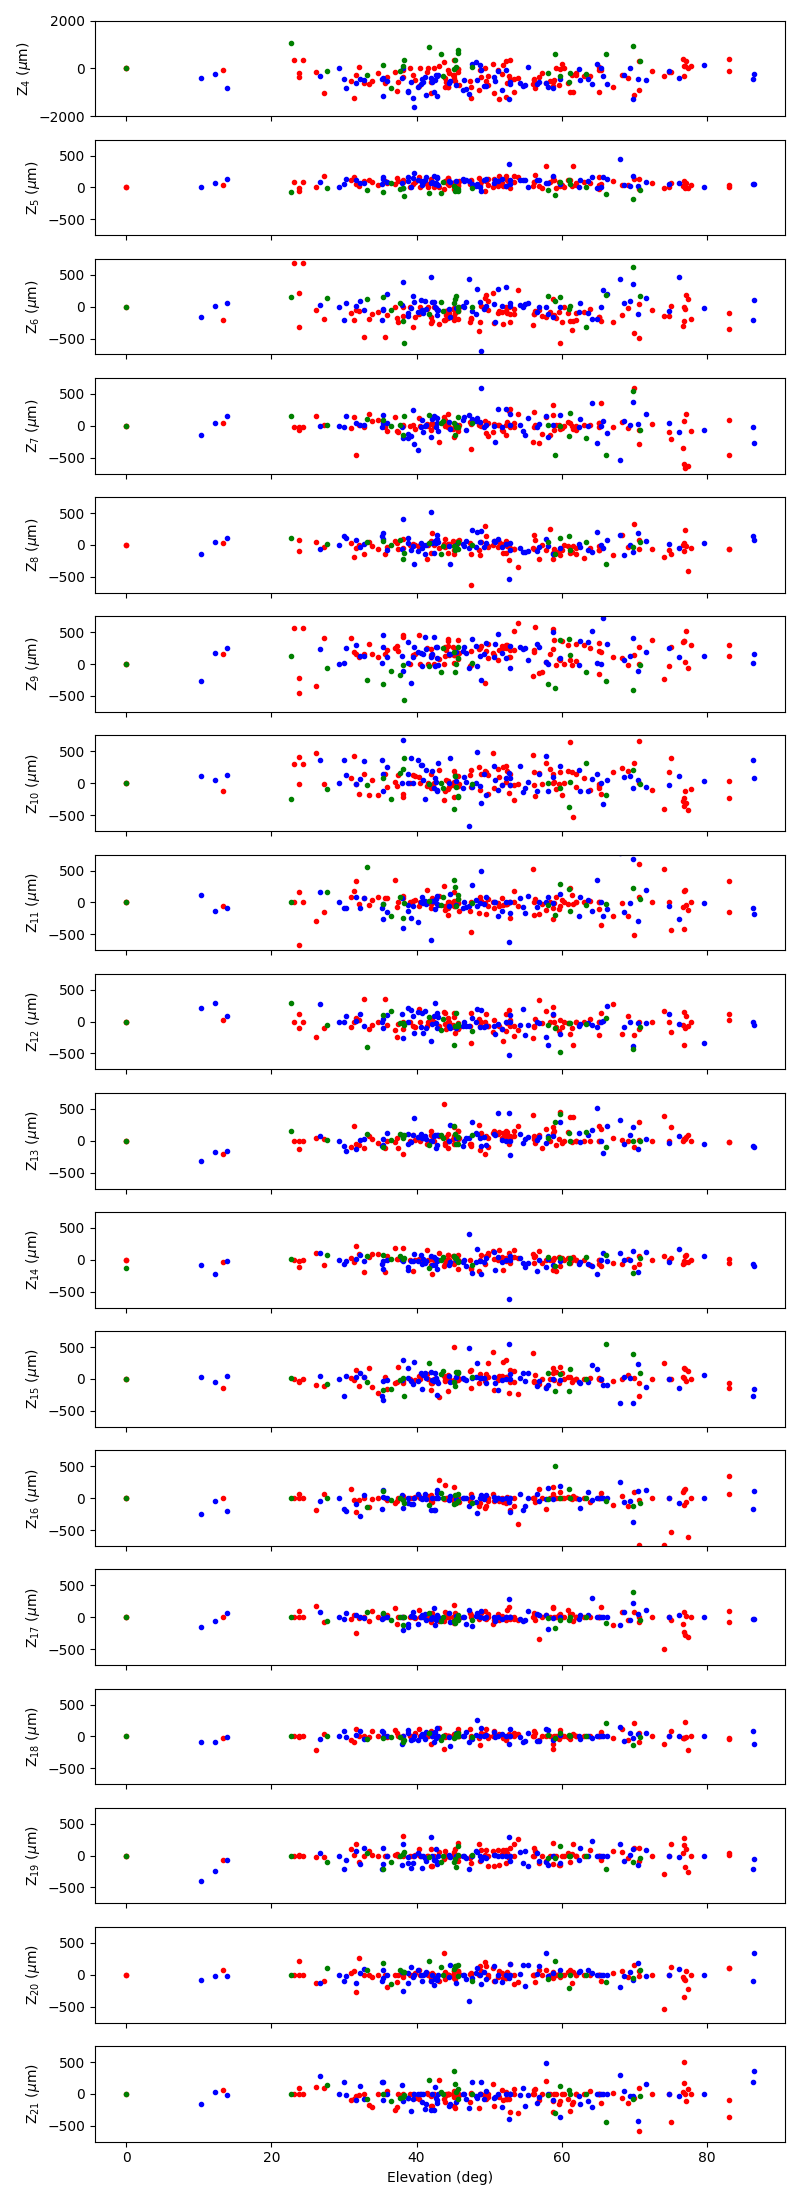

In [95]:
zmax = 21
nz = 21-4
norm = {4: 2000, 5:500, }
fig = plt.figure(figsize=(8,22))
for i,z in enumerate(range(4,zmax+1)):
    axi = fig.add_subplot(nz+1,1,i+1)
    axi.plot(el_arr20, zt_arr20[:,z], 'r.')
    axi.plot(el_arr22, zt_arr22[:,z], 'b.')
    axi.plot(el_arr16, zt_arr16[:,z], 'g.')
    if i < nz:
        axi.axes.get_xaxis().set_ticklabels([])
    if z == 4:
        axi.set_ylim(-1*norm[z], norm[z])
    else:
        axi.set_ylim(-750, 750)
    axi.set_ylabel(f"Z$_{{{z}}}$ ($\mu$m)")

axi.set_xlabel("Elevation (deg)")
        
plt.tight_layout()

plt.savefig("Thermal_Zernike_2016_vs_2020_vs_2022.png")

<IPython.core.display.Javascript object>


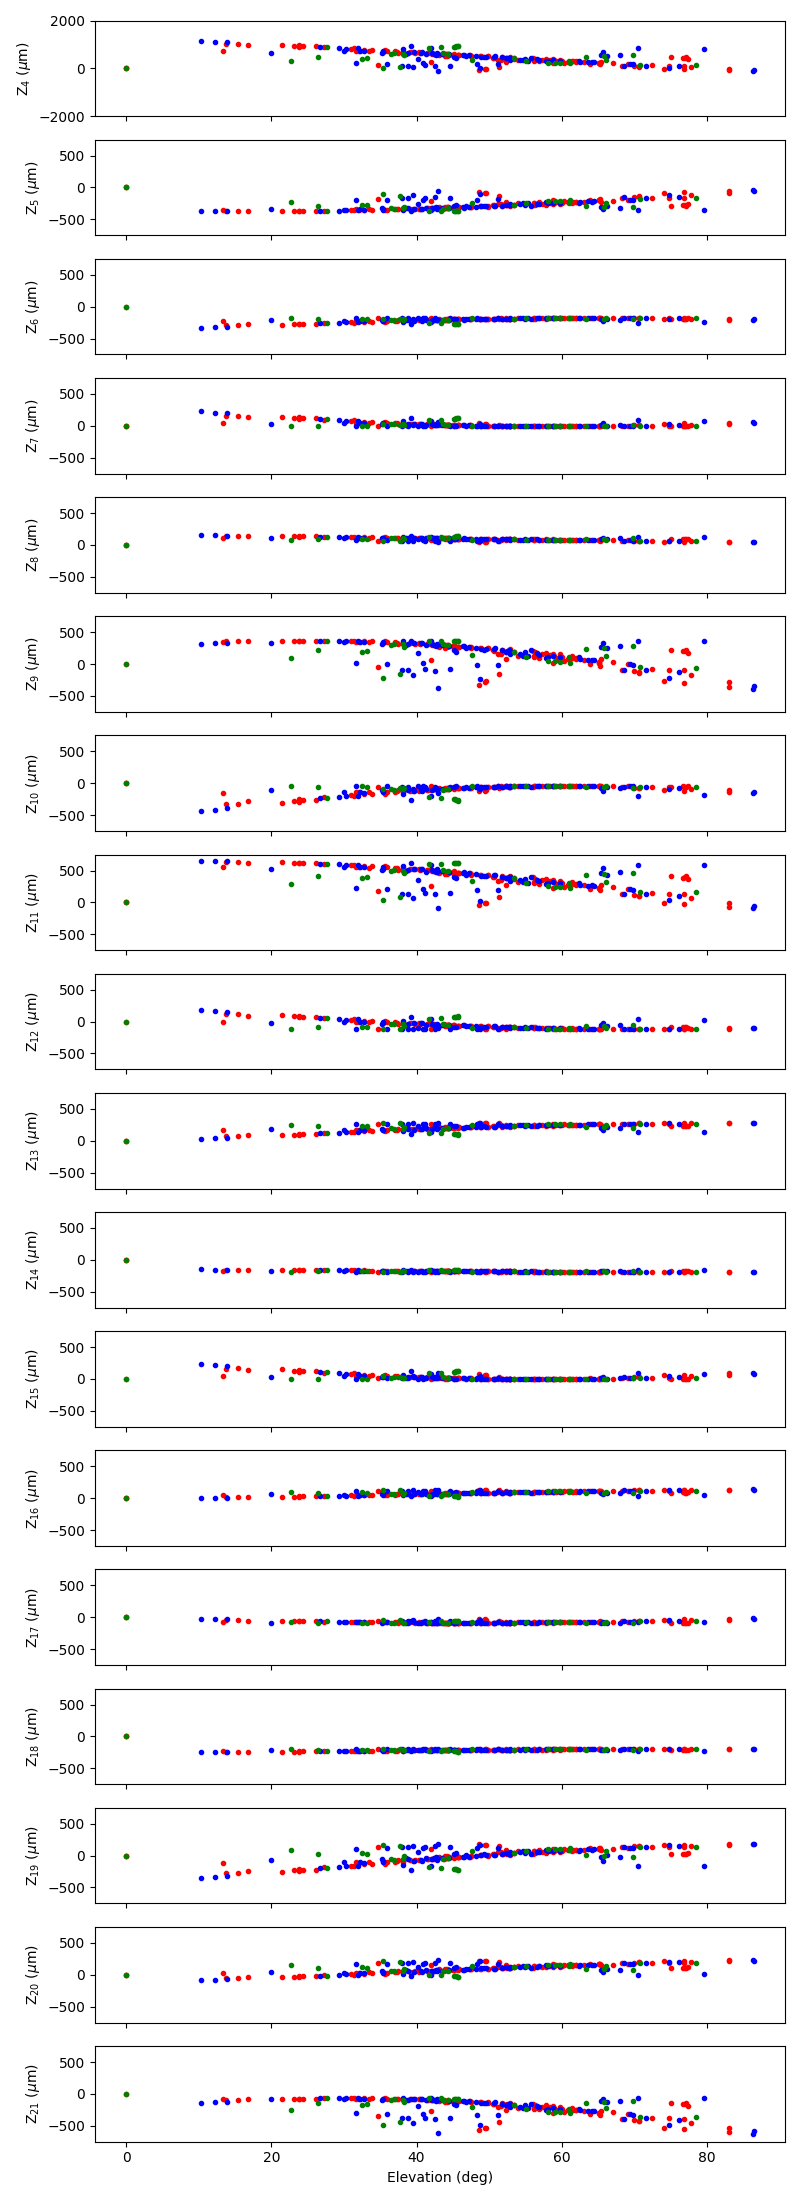

In [96]:
zmax = 21
nz = 21-4
norm = {4: 2000, 5:500, }
fig = plt.figure(figsize=(8,22))
for i,z in enumerate(range(4,zmax+1)):
    axi = fig.add_subplot(nz+1,1,i+1)
    axi.plot(el_arr20, zg_arr20[:,z], 'r.')
    axi.plot(el_arr22, zg_arr22[:,z], 'b.')
    axi.plot(el_arr16, zg_arr16[:,z], 'g.')
    if i < nz:
        axi.axes.get_xaxis().set_ticklabels([])
    if z == 4:
        axi.set_ylim(-1*norm[z], norm[z])
    else:
        axi.set_ylim(-750, 750)
    axi.set_ylabel(f"Z$_{{{z}}}$ ($\mu$m)")

axi.set_xlabel("Elevation (deg)")
        
plt.tight_layout()

plt.savefig("Gravity_Zernike_2016_vs_2020_vs_2022.png")